In [12]:
import MCEq.particlemanager as pman
import MCEq.data as data
import mceq_config as config
import matplotlib.pyplot as plt

In [13]:

config.adv_set["no_mixing"] = True


hdf5_back = data.HDF5Backend()
ics = data.InteractionCrossSections(hdf5_back)
# print(ff)
proton = pman.MCEqParticle(
    pdg_id=2212, helicity=0, cs_db=ics, energy_grid=hdf5_back.energy_grid
)
pion = pman.MCEqParticle(
    pdg_id=211, helicity=0, cs_db=ics, energy_grid=hdf5_back.energy_grid
)
# part._calculate_mixing_energy()
# inter = data.Interactions(data.HDF5Backend())
# part.set_cs(ics)


/tmp/ipykernel_3356586/4056511921.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(hdf5_back.energy_grid.c, 1/proton.inverse_interaction_length())


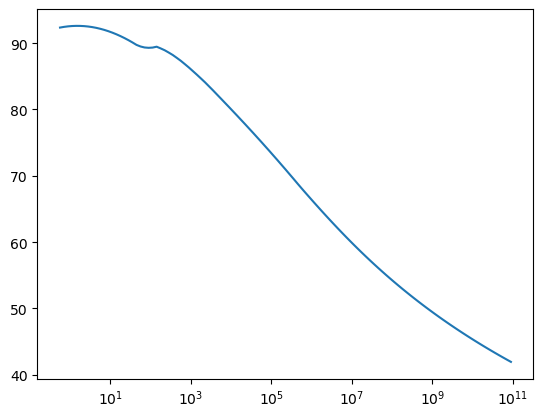

In [15]:
plt.semilogx(hdf5_back.energy_grid.c, 1/proton.inverse_interaction_length())
# plt.semilogx(hdf5_back.energy_grid.c, 1/pion.inverse_interaction_length())


(array([1.38007061e-02, 1.02345059e-02, 7.15682634e-03, 5.19297365e-03,
        3.93747579e-03, 2.43771764e-03, 1.70982199e-03, 1.19199019e-03,
        1.01123758e-03, 6.49732357e-04, 4.29898101e-04, 3.41964398e-04,
        2.34489873e-04, 1.85637816e-04, 8.30484967e-05, 7.32780854e-05,
        3.90816455e-05, 3.90816455e-05, 2.44260285e-05, 1.95408228e-05,
        9.77041138e-06, 9.77041138e-06, 2.93112341e-05, 0.00000000e+00,
        4.88520569e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.88520569e-06]),
 array([2.87035894e-03, 2.04728375e+01, 4.09428047e+01, 6.14127718e+01,
        8.18827390e+01, 1.02352706e+02, 1.22822673e+02, 1.43292640e+02,
        1.63762608e+02, 1.84232575e+02, 2.04702542e+02, 2.25172509e+02,
        2.45642476e+02, 2.66112443e+02, 2.86582410e+02, 3.07052378e+02,
        3.27522345e+02, 3.47992312e+02, 3.68462279e+02, 3.88932246e+02,
        4.09402213e+02, 4.29872181e+02, 4.50342148e+02, 4.70812115e+02,
        4.91282082e+02

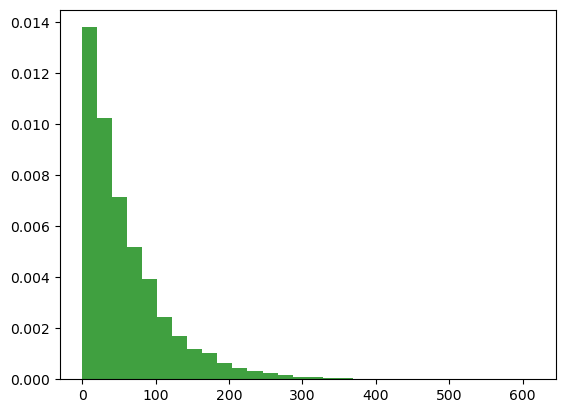

In [21]:
import random
import numpy as np
import boost_histogram as bh


hist = bh.Histogram(bh.axis.Regular(bins=30, start=0, stop=100))

# z = random.random()

def rand_length():
    return -np.log(1-random.random())* 1/proton.inverse_interaction_length()[80]

x = np.array([rand_length() for _ in range(10000)])
 
# hist.view() 
# hist.
# plt.hi
# hist.axes.centers
# plt.hist(hist.axes.centers, hist.view())
plt.hist(x, 30, density=True, facecolor='g', alpha=0.75)
# fig()
# mesh = ax.pcolormesh(*hist.axes.edges.T, density.T)
# fig.colorbar(mesh)
# plt.savefig("simple_density.png")

In [1]:
import impy
from impy.constants import TeV



ekin = impy.kinematics.CenterOfMass(10, "proton", "proton")
gen = impy.models.Sibyll23d(ekin)



 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

359.03268389323034
 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [1]:

import impy
import random
import numpy as np
import dataclasses


@dataclasses.dataclass
class ShowerParticle:
    pid : float
    energy : float
    xlen : float
    history : list
    
@dataclasses.dataclass
class ShowerGeneration:
    xlen : float
    generation : list
    
    

class interaction_length():
    
    mbarn_in_cm2 = 1e-27
    proton_mass_g = 1.672621e-24
    mass_barn = proton_mass_g/mbarn_in_cm2
    
    def __init__(self):
        ekin = impy.kinematics.FixedTarget(10, "proton", (14, 7))
        self.gen = impy.models.Sibyll23d(ekin)
    
    def get_int_xlength(self, energy, average_A = 14):
        self.gen.event_kinematics = impy.kinematics.FixedTarget(energy, "proton", (14, 7))
        return average_A*self.mass_barn/self.gen.sigma_inel_air()
    
    def get_xlength(self, energy, average_A = 14):
        xlen = self.get_int_xlength(energy, average_A)
        return -np.log(1-random.random())*xlen
    
    def get_pid_energy(self):
        genn = self.gen(1)
        event = next(genn)
        return event.pid
    
xlen = interaction_length()        

 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [3]:

print(xlen.get_int_xlength(1e3))

print(xlen.get_xlength(1e3))

print(np.sort(xlen.get_pid_energy()))   



82.20746739696882
2.13296662196959
[-2112  -321  -213  -211  -211  -211  -211  -211  -211  -211  -211  -211
  -211    22    22    22    22   111   111   111   111   111   111   111
   111   111   111   111   111   111   111   111   111   111   111   113
   113   211   211   211   211   211   211   211   211   211   213   221
   221   221   221   223   223   313   321   321   331   331  2112  2212
  2212  2212  3122]
